In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statistics

In [2]:
train_dataframe = pd.read_csv('A2Q2Data_train.csv', header=None)
test_dataframe = pd.read_csv('A2Q2Data_test.csv', header=None) 

train_data = train_dataframe.values
test_data = test_dataframe.values

train_X = train_data[:, :-1]
train_X = train_X.T
train_Y = train_data[:, -1]
test_X = test_data[:, :-1]
test_X = test_X.T
test_Y = test_data[:, -1]

In [3]:
def train_error(w):
    return np.linalg.norm(np.matmul(train_X.T, w)-train_Y.reshape(-1,1))**2
def test_error(w):
    return np.linalg.norm(np.matmul(test_X.T, w)-test_Y.reshape(-1,1))**2

In [4]:
W_ML = np.matmul(np.matmul(np.linalg.inv(np.matmul(train_X,train_X.T, dtype='float64')), train_X, dtype='float64'), train_Y.reshape(-1,1), dtype='float64')
print(f'Train Data Error for w_ML = {train_error(W_ML)}')
print(f'Test Data Error w_ML= {test_error(W_ML)}')

Train Data Error for w_ML = 396.8644186272515
Test Data Error w_ML= 185.3636555848962


## Gradient descentt

Iterarions: 552
Train Data Error for GD = 721.0493482157449
Test Data Error for GD= 131.21376965156736


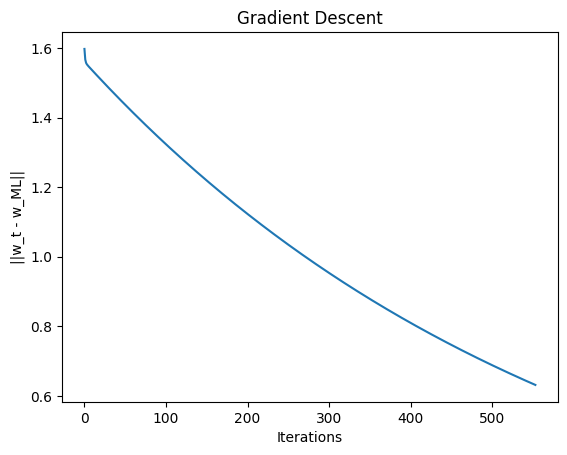

In [5]:
w_grad = np.full((train_X.shape[0],1),0.01 , dtype='float64')
eta = 1e-6
itr=0
w_grad_diff = []
w_grad_diff.append(np.linalg.norm(W_ML - w_grad))
while(True):
#for i in range(1000):
    w_grad_new = w_grad - 2*eta*np.matmul(train_X, np.subtract(np.matmul(train_X.T, w_grad, dtype='float64'),train_Y.reshape(-1,1), dtype='float64'), dtype='float64')
    w_grad_diff.append(np.linalg.norm(W_ML - w_grad_new))
    # if np.linalg.norm(w_grad_new - w_grad) < 1e-3:
    #    break
    if(np.linalg.norm(w_grad_new - w_grad)/np.linalg.norm(w_grad) < 0.001):
        break
    w_grad = w_grad_new
    itr+=1
print(f'Iterarions: {itr}')
print(f'Train Data Error for GD = {train_error(w_grad)}')
print(f'Test Data Error for GD= {test_error(w_grad)}')    
plt.plot(range(len(w_grad_diff)), w_grad_diff)
plt.xlabel('Iterations')
plt.ylabel('||w_t - w_ML||')
plt.title('Gradient Descent')
plt.show()

## Stochastic Gradient Descent

Iterarions: 756
Train Data Error for SGD = 1045.3386917661762
Test Data Error for SGD= 118.16534073493754


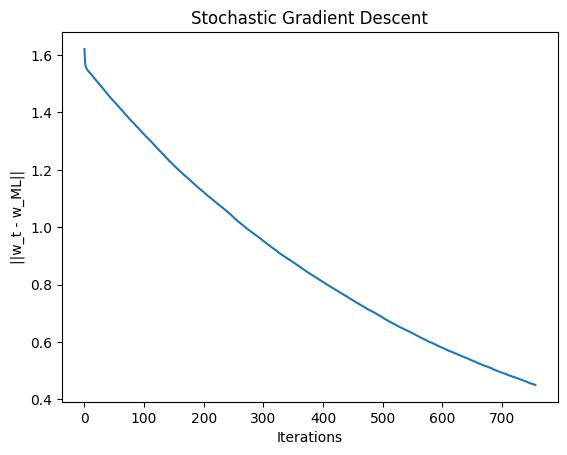

In [6]:
w_grad = np.full((train_X.shape[0],1),0.0 , dtype='float64')
eta = 1e-4
batch_size = 100
itr=0
w_grad_diff = []
w_grad_diff.append(np.linalg.norm(W_ML - w_grad))
w_gradsum = np.full((train_X.shape[0],1),0.0 , dtype='float64')
w_gradsum += w_grad
itr=0
objvals = []
#for i in range(100):
while(True):
    sample_indices = np.random.choice(train_X.shape[1], batch_size, replace=False)
    X_batch = train_X[:, sample_indices]
    Y_batch = train_Y[sample_indices]

    # start_index = (i * batch_size) % train_X.shape[1]
    # end_index = start_index + batch_size
    # X_batch = train_X[:, start_index:end_index]
    # Y_batch = train_Y[start_index:end_index]

    w_grad_new = w_grad - 2*eta*np.matmul(X_batch, np.subtract(np.matmul(X_batch.T, w_grad, dtype='float64'),Y_batch.reshape(-1,1), dtype='float64'), dtype='float64') 
    if(np.linalg.norm(w_grad_new - w_grad)/np.linalg.norm(w_grad_new) < 0.001):
        break
    w_grad_diff.append(np.linalg.norm(W_ML - w_grad_new))
    w_gradsum += w_grad_new
    itr+=1
    w_grad = w_grad_new
w_grad_SGD = w_gradsum/itr
print(f'Iterarions: {itr}')
print(f'Train Data Error for SGD = {train_error(w_grad_SGD)}')
print(f'Test Data Error for SGD= {test_error(w_grad_SGD)}')
plt.plot(range(len(w_grad_diff)), w_grad_diff)
plt.xlabel('Iterations')
plt.ylabel('||w_t - w_ML||')
plt.title('Stochastic Gradient Descent')
plt.show()

## Ridge regression

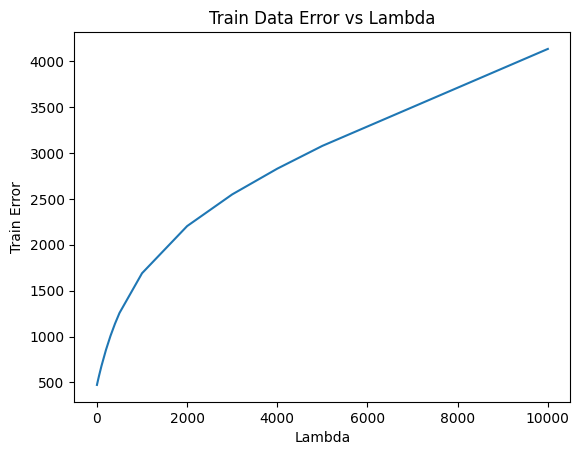

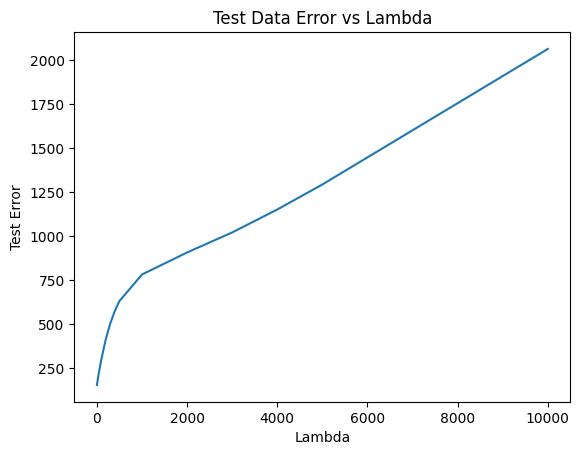

In [7]:
def train_error_ridge(w, lamda):
    return np.linalg.norm(train_X.T @ w - train_Y.reshape(-1, 1))**2 + lamda*np.linalg.norm(w)**2
def test_error_ridge(w, lamda):
    return np.linalg.norm(test_X.T @ w - test_Y.reshape(-1, 1))**2 + lamda*np.linalg.norm(w)**2

def gradient_desc_ridge(w_grad, X, Y, eta, lamda):
    return w_grad - 2*eta*(X @ (X.T @ w_grad - Y.reshape(-1,1)) + lamda * w_grad)

eta = 1e-6
#lamda_set = [0.01, 0.1, 1,2, 3, 4,10, 20,30, 40, 100,200, 300, 1000,2000, 3000, 4000, 10000]
lamda_set = [0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 1, 2, 3, 4, 5, 10, 12, 20, 30, 40, 50, 100, 200, 300, 400, 500, 1000, 2000, 3000,4000,5000, 10000]
w_grad_set = []
train_error_set = []
test_error_set = []
for lamda in lamda_set:
    w_grad = np.full((train_X.shape[0],1),0.1 , dtype='float64')
    itr=0
    #while(True):
    for i in range(1000):
        w_grad_new = gradient_desc_ridge(w_grad, train_X, train_Y, eta, lamda)
        # if np.linalg.norm(w_grad_new - w_grad) < 1e-3:
        #    break
        # if(np.linalg.norm(w_grad_new - w_grad)/np.linalg.norm(w_grad) < 0.001):
        #     break
        w_grad = w_grad_new
        itr+=1
    w_grad_set.append(w_grad)
    train_error_set.append(train_error_ridge(w_grad, lamda))
    test_error_set.append(test_error_ridge(w_grad, lamda))
plt.plot(lamda_set, train_error_set)
plt.xlabel('Lambda')
plt.ylabel('Train Error')
plt.title('Train Data Error vs Lambda')
plt.show()
plt.plot(lamda_set, test_error_set)
plt.xlabel('Lambda')
plt.ylabel('Test Error')
plt.title('Test Data Error vs Lambda')
plt.show()

In [8]:
print(f'Test Data Error for w_R = {test_error_set[0]}')
print(f'Test Data Error for w_ML = {test_error(W_ML)}')
print(f'Train Data Error for w_R = {train_error_set[0]}')
print(f'Train Data Error for w_ML = {train_error(W_ML)}')

Test Data Error for w_R = 155.46885222094315
Test Data Error for w_ML = 185.3636555848962
Train Data Error for w_R = 472.44676838315377
Train Data Error for w_ML = 396.8644186272515
